<a href="https://colab.research.google.com/github/agerj07/walking_gait_classifier/blob/main/WalkingGait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch.optim as optim
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/datasets/test1.csv"
df = pd.read_csv(path)
print(df.shape)
path = "/content/drive/My Drive/datasets/test2.csv"
df2 = pd.read_csv(path)
print(df2.shape)
path = "/content/drive/My Drive/datasets/test3.csv"
df3 = pd.read_csv(path)
print(df3.shape)
path = "/content/drive/My Drive/datasets/test4.csv"
df4 = pd.read_csv(path)
print(df4.shape)
path = "/content/drive/My Drive/datasets/test5.csv"
df5 = pd.read_csv(path)
print(df5.shape)
path = "/content/drive/My Drive/datasets/test6.csv"
df6 = pd.read_csv(path)
print(df6.shape)
path = "/content/drive/My Drive/datasets/test7.csv"
df7 = pd.read_csv(path)
print(df7.shape)
path = "/content/drive/My Drive/datasets/test8.csv"
df8 = pd.read_csv(path)
print(df8.shape)
path = "/content/drive/My Drive/datasets/test9.csv"
df9 = pd.read_csv(path)
print(df9.shape)
path = "/content/drive/My Drive/datasets/test10.csv"
df10 = pd.read_csv(path)
print(df10.shape)
path = "/content/drive/My Drive/datasets/test11.csv"
df11 = pd.read_csv(path)
print(df11.shape)
path = "/content/drive/My Drive/datasets/test12.csv"
df12 = pd.read_csv(path)
print(df12.shape)
path = "/content/drive/My Drive/datasets/test13.csv"
df13 = pd.read_csv(path)
print(df13.shape)
path = "/content/drive/My Drive/datasets/test14.csv"
df14 = pd.read_csv(path)
print(df14.shape)
path = "/content/drive/My Drive/datasets/test15.csv"
df15 = pd.read_csv(path)
print(df15.shape)
path = "/content/drive/My Drive/datasets/test16.csv"
df16 = pd.read_csv(path)
print(df16.shape)
path = "/content/drive/My Drive/datasets/test17.csv"
df17 = pd.read_csv(path)
print(df17.shape)
path = "/content/drive/My Drive/datasets/test18.csv"
df18 = pd.read_csv(path)
print(df18.shape)
path = "/content/drive/My Drive/datasets/test19.csv"
df19 = pd.read_csv(path)
print(df19.shape)
path = "/content/drive/My Drive/datasets/test20.csv"
df20 = pd.read_csv(path)
print(df20.shape)
path = "/content/drive/My Drive/datasets/test21.csv"
df21 = pd.read_csv(path)
print(df21.shape)
path = "/content/drive/My Drive/datasets/test22.csv"
df22 = pd.read_csv(path)
print(df22.shape)
path = "/content/drive/My Drive/datasets/test23.csv"
df23 = pd.read_csv(path)
print(df23.shape)
path = "/content/drive/My Drive/datasets/test24.csv"
df24 = pd.read_csv(path)
print(df24.shape)
path = "/content/drive/My Drive/datasets/test25.csv"
df25 = pd.read_csv(path)
print(df25.shape)
df = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25], ignore_index=True)
print(df.shape)


(50, 18)
(41, 18)
(43, 18)
(43, 18)
(40, 18)
(45, 18)
(45, 18)
(47, 18)
(44, 18)
(41, 18)
(48, 18)
(44, 18)
(43, 18)
(44, 18)
(42, 18)
(50, 18)
(53, 18)
(51, 18)
(58, 18)
(55, 18)
(48, 18)
(46, 18)
(38, 18)
(41, 18)
(38, 18)
(1138, 18)


In [ ]:
df

,timestamp,roll_angle1,pitch_angle1,roll_angle2,pitch_angle2,acc_x1,acc_y1,acc_z1,vel_x1,vel_y1,vel_z1,acc_x2,acc_y2,acc_z2,vel_x2,vel_y2,vel_z2,state
0,1.159238,-0.479690,63.908455,-8.248703,74.203304,-1.631045,0.665996,1.216426,-57.822427,42.313496,-13.631878,-1.084668,-0.334492,-0.281309,-71.997145,58.757069,0.705145,heel strike
1,1.194154,-1.490652,62.994916,-9.323907,74.935528,-1.261904,-0.352803,-0.799199,-13.837695,72.145557,-9.341802,-1.195508,-0.115254,-0.395322,-36.012412,71.337221,21.010489,loading response
2,1.225505,0.232371,66.751861,-11.317857,77.855623,-0.875430,0.098613,-0.279424,46.681389,55.214260,20.612397,-1.471631,-0.030049,-0.251768,-78.195618,59.550962,5.682244,loading response
3,1.262969,1.727502,72.213859,-13.485976,81.057967,-1.311953,0.241924,-0.073369,29.383679,63.641740,20.062779,-1.443799,0.095439,-0.204404,-78.531496,84.634931,7.987588,loading response
4,1.298152,3.275882,73.773647,-14.438781,82.470256,-0.959658,0.248271,0.088496,29.612687,33.321130,16.933008,-1.240918,0.230449,0.049014,-59.294855,81.062412,43.025756,loading response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2.326583,12.245524,54.037435,-4.284808,74.645856,-1.733584,0.109600,-0.883672,-107.906061,-267.295695,104.072229,-1.033154,-0.170430,-0.321592,6.340336,62.306840,3.063588,terminal swing
1134,2.358872,6.438028,49.439844,-4.332701,74.751441,-1.625186,0.187969,-1.159063,-178.287740,-207.433099,82.591313,-0.995068,-0.143574,-0.317197,3.470107,59.039664,-2.600534,terminal swing
1135,2.391867,1.023646,44.406098,-4.944094,74.243549,-1.269961,-0.006611,-1.457158,-162.470947,-107.509435,50.698183,-0.973340,-0.194355,-0.335996,-10.575695,65.604550,-1.837176,terminal swing
1136,2.427794,-1.983003,36.093079,-6.081227,74.792356,-0.633975,-0.259785,2.130000,-77.722855,12.750107,27.461542,-1.009473,-0.257100,-0.277891,-21.781802,81.833557,0.559771,terminal swing


In [ ]:
#Change last column from strings to integers
#df['state'] = df['state'].replace('heel strike', 0.0)
#df['state'] = df['state'].replace('loading response', 1.0)
#df['state'] = df['state'].replace('midstance', 2.0)
#df['state'] = df['state'].replace('terminal stance', 3.0)
#df['state'] = df['state'].replace('preswing', 4.0)
#df['state'] = df['state'].replace('initial swing', 5.0)
#df['state'] = df['state'].replace('midswing', 6.0)
#df['state'] = df['state'].replace('terminal swing', 7.0)

df['state'] = df['state'].replace('heel strike', 0.0)
df['state'] = df['state'].replace('loading response', 0.0)
df['state'] = df['state'].replace('midstance', 1.0)
df['state'] = df['state'].replace('terminal stance', 2.0)
df['state'] = df['state'].replace('preswing', 3.0)
df['state'] = df['state'].replace('initial swing', 4.0)
df['state'] = df['state'].replace('midswing', 4.0)
df['state'] = df['state'].replace('terminal swing', 5.0)


df['state'] = df['state'].replace(' heel strike', 0.0)
#df['state'] = df['state'].replace(' loading response', 1.0)
df['state'] = df['state'].replace(' loading response', 0.0)
#df['state'] = df['state'].replace(' midstance', 2.0)
df['state'] = df['state'].replace(' midstance', 1.0)
#df['state'] = df['state'].replace(' terminal stance', 3.0)
df['state'] = df['state'].replace(' terminal stance', 2.0)
#df['state'] = df['state'].replace(' preswing', 4.0)
df['state'] = df['state'].replace(' preswing', 3.0)
#df['state'] = df['state'].replace(' initial swing', 5.0)
df['state'] = df['state'].replace(' initial swing', 4.0)
#df['state'] = df['state'].replace(' midswing', 6.0)
df['state'] = df['state'].replace(' midswing', 4.0)
#df['state'] = df['state'].replace(' terminal swing', 7.0)
df['state'] = df['state'].replace(' terminal swing', 5.0)

df['state'] = df['state'].replace('heelstrike', 0.0)
#df['state'] = df['state'].replace('teq swing', 7.0)
df['state'] = df['state'].replace('teq swing', 5.0)
#df['state'] = df['state'].replace('terminal state', 7.0)
df['state'] = df['state'].replace('terminal state', 5.0)


#df['state'] = df['state'].replace('heel strike ', 0.0)
#df['state'] = df['state'].replace('loading response ', 1.0)
#df['state'] = df['state'].replace('midstance ', 2.0)
#df['state'] = df['state'].replace('terminal stance ', 3.0)
#df['state'] = df['state'].replace('preswing ', 4.0)
#df['state'] = df['state'].replace('initial swing ', 5.0)
#df['state'] = df['state'].replace('midswing ', 6.0)
#df['state'] = df['state'].replace('terminal swing ', 7.0)







/tmp/ipython-input-4237762564.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state'] = df['state'].replace('heelstrike', 0.0)


In [ ]:
df

,timestamp,roll_angle1,pitch_angle1,roll_angle2,pitch_angle2,acc_x1,acc_y1,acc_z1,vel_x1,vel_y1,vel_z1,acc_x2,acc_y2,acc_z2,vel_x2,vel_y2,vel_z2,state
0,1.159238,-0.479690,63.908455,-8.248703,74.203304,-1.631045,0.665996,1.216426,-57.822427,42.313496,-13.631878,-1.084668,-0.334492,-0.281309,-71.997145,58.757069,0.705145,0.0
1,1.194154,-1.490652,62.994916,-9.323907,74.935528,-1.261904,-0.352803,-0.799199,-13.837695,72.145557,-9.341802,-1.195508,-0.115254,-0.395322,-36.012412,71.337221,21.010489,0.0
2,1.225505,0.232371,66.751861,-11.317857,77.855623,-0.875430,0.098613,-0.279424,46.681389,55.214260,20.612397,-1.471631,-0.030049,-0.251768,-78.195618,59.550962,5.682244,0.0
3,1.262969,1.727502,72.213859,-13.485976,81.057967,-1.311953,0.241924,-0.073369,29.383679,63.641740,20.062779,-1.443799,0.095439,-0.204404,-78.531496,84.634931,7.987588,0.0
4,1.298152,3.275882,73.773647,-14.438781,82.470256,-0.959658,0.248271,0.088496,29.612687,33.321130,16.933008,-1.240918,0.230449,0.049014,-59.294855,81.062412,43.025756,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2.326583,12.245524,54.037435,-4.284808,74.645856,-1.733584,0.109600,-0.883672,-107.906061,-267.295695,104.072229,-1.033154,-0.170430,-0.321592,6.340336,62.306840,3.063588,5.0
1134,2.358872,6.438028,49.439844,-4.332701,74.751441,-1.625186,0.187969,-1.159063,-178.287740,-207.433099,82.591313,-0.995068,-0.143574,-0.317197,3.470107,59.039664,-2.600534,5.0
1135,2.391867,1.023646,44.406098,-4.944094,74.243549,-1.269961,-0.006611,-1.457158,-162.470947,-107.509435,50.698183,-0.973340,-0.194355,-0.335996,-10.575695,65.604550,-1.837176,5.0
1136,2.427794,-1.983003,36.093079,-6.081227,74.792356,-0.633975,-0.259785,2.130000,-77.722855,12.750107,27.461542,-1.009473,-0.257100,-0.277891,-21.781802,81.833557,0.559771,5.0


In [ ]:
#Seperate the features and the outcomes as X and y
X = df.drop('state', axis=1)
X = X.drop('timestamp', axis=1)
y = df['state']
y.value_counts()

,count
state,
2.0,306
4.0,203
5.0,188
0.0,181
1.0,139
3.0,121


In [ ]:
X

,roll_angle1,pitch_angle1,roll_angle2,pitch_angle2,acc_x1,acc_y1,acc_z1,vel_x1,vel_y1,vel_z1,acc_x2,acc_y2,acc_z2,vel_x2,vel_y2,vel_z2
0,-0.479690,63.908455,-8.248703,74.203304,-1.631045,0.665996,1.216426,-57.822427,42.313496,-13.631878,-1.084668,-0.334492,-0.281309,-71.997145,58.757069,0.705145
1,-1.490652,62.994916,-9.323907,74.935528,-1.261904,-0.352803,-0.799199,-13.837695,72.145557,-9.341802,-1.195508,-0.115254,-0.395322,-36.012412,71.337221,21.010489
2,0.232371,66.751861,-11.317857,77.855623,-0.875430,0.098613,-0.279424,46.681389,55.214260,20.612397,-1.471631,-0.030049,-0.251768,-78.195618,59.550962,5.682244
3,1.727502,72.213859,-13.485976,81.057967,-1.311953,0.241924,-0.073369,29.383679,63.641740,20.062779,-1.443799,0.095439,-0.204404,-78.531496,84.634931,7.987588
4,3.275882,73.773647,-14.438781,82.470256,-0.959658,0.248271,0.088496,29.612687,33.321130,16.933008,-1.240918,0.230449,0.049014,-59.294855,81.062412,43.025756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,12.245524,54.037435,-4.284808,74.645856,-1.733584,0.109600,-0.883672,-107.906061,-267.295695,104.072229,-1.033154,-0.170430,-0.321592,6.340336,62.306840,3.063588
1134,6.438028,49.439844,-4.332701,74.751441,-1.625186,0.187969,-1.159063,-178.287740,-207.433099,82.591313,-0.995068,-0.143574,-0.317197,3.470107,59.039664,-2.600534
1135,1.023646,44.406098,-4.944094,74.243549,-1.269961,-0.006611,-1.457158,-162.470947,-107.509435,50.698183,-0.973340,-0.194355,-0.335996,-10.575695,65.604550,-1.837176
1136,-1.983003,36.093079,-6.081227,74.792356,-0.633975,-0.259785,2.130000,-77.722855,12.750107,27.461542,-1.009473,-0.257100,-0.277891,-21.781802,81.833557,0.559771


In [ ]:
y

,state
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1133,5.0
1134,5.0
1135,5.0
1136,5.0


In [ ]:
sensor_columns = [
    'roll_angle1', 'pitch_angle1', 'roll_angle2', 'pitch_angle2',
    'acc_x1', 'acc_y1', 'acc_z1',
    'vel_x1', 'vel_y1', 'vel_z1',
    'acc_x2', 'acc_y2', 'acc_z2',
    'vel_x2', 'vel_y2', 'vel_z2'
]

def create_windowed_data(dataframe, window_size=8, stride=1):
  X, y = [], []
  for i in range(0, len(dataframe)-window_size + 1, stride):
    window = dataframe.iloc[i:i+window_size]
    features = window[sensor_columns].values
    labels = window["state"].iloc[window_size // 2]
    X.append(features)
    y.append(labels)

  return np.array(X), np.array(y)

X, y = create_windowed_data(df)

In [ ]:
from imblearn.combine import SMOTETomek

n_samples, window_size, n_features = X.shape
X_flat = X.reshape(n_samples, window_size * n_features)

#blsmote = BorderlineSMOTE(sampling_strategy='not majority', kind='borderline-2')
smt = SMOTETomek(sampling_strategy='auto')
#X_sm, y_sm = blsmote.fit_resample(X_flat, y)
X_sm, y_sm = smt.fit_resample(X_flat, y)

X_sm = X_sm.reshape(-1, window_size, n_features)
y_series = pd.Series(y_sm)
print(y_series.value_counts())

0.0    305
5.0    305
1.0    302
4.0    301
3.0    298
2.0    297
Name: count, dtype: int64


In [ ]:
X_sm

array([[[-4.79689924e-01,  6.39084555e+01, -8.24870257e+00, ...,
         -7.19971450e+01,  5.87570687e+01,  7.05145038e-01],
        [-1.49065169e+00,  6.29949164e+01, -9.32390672e+00, ...,
         -3.60124122e+01,  7.13372214e+01,  2.10104885e+01],
        [ 2.32370970e-01,  6.67518614e+01, -1.13178568e+01, ...,
         -7.81956183e+01,  5.95509618e+01,  5.68224427e+00],
        ...,
        [ 3.26137276e+00,  7.80370351e+01, -1.51478805e+01, ...,
         -5.90353130e+01,  9.57799695e+01,  2.85496183e-03],
        [ 2.51308658e+00,  8.19286108e+01, -1.79721232e+01, ...,
         -9.41650840e+01,  4.41769160e+01, -3.28521069e+01],
        [ 2.75799919e+00,  8.36686478e+01, -2.05917902e+01, ...,
         -1.16500962e+02, -1.65864427e+01, -1.35849313e+01]],

       [[-1.49065169e+00,  6.29949164e+01, -9.32390672e+00, ...,
         -3.60124122e+01,  7.13372214e+01,  2.10104885e+01],
        [ 2.32370970e-01,  6.67518614e+01, -1.13178568e+01, ...,
         -7.81956183e+01,  5.95509618e

In [ ]:
y_sm

array([0., 0., 1., ..., 5., 5., 5.])

In [ ]:
len(df)

1138

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=41, stratify=y_sm)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1446, 8, 16), (362, 8, 16), (1446,), (362,))

In [ ]:

#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train.shape, X_test.shape

(torch.Size([1446, 8, 16]), torch.Size([362, 8, 16]))

In [ ]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
X_train.shape

torch.Size([1446, 8, 16])

In [ ]:
X_train = X_train.permute(0, 2, 1)  # from (batch, time, features) to (batch, channels, time)
X_test = X_test.permute(0, 2, 1)

In [ ]:
X_train.shape
#y_train[0]


torch.Size([1446, 16, 8])

In [ ]:
# Model Class
class GaitCNN(nn.Module):
  def __init__(self):
    super().__init__()
    # LSTM layer
    self.lstm = nn.LSTM(input_size=16, hidden_size=64, num_layers=3, batch_first=True)
    self.dropout = nn.Dropout(0.3)

    # CNN layers to process LSTM output sequence
    # LSTM output shape (batch_size, time, hidden_size) -> permute -> (batch_size, hidden_size, time)
    # hidden_size becomes in_channels for Conv1d
    self.conv1 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool1d(kernel_size=2)

    self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.pool2 = nn.MaxPool1d(kernel_size=2)

    self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.pool3 = nn.MaxPool1d(kernel_size=2)

    # Calculate flattened size after CNNs and pooling
    # Input to CNNs is (batch_size, 64, 8)
    # conv1: (8 - 3 + 2*1)/1 + 1 = 8 -> pool1: 8/2 = 4
    # conv2: (4 - 3 + 2*1)/1 + 1 = 4 -> pool2: 4/2 = 2
    # conv3: (2 - 3 + 2*1)/1 + 1 = 2 -> pool3: 2/2 = 1
    # Output shape after pool3: (batch_size, 128, 1)
    # Flattened size: 128 * 1 = 128

    # Fully connected layers
    self.fc1 = nn.Linear(in_features=128, out_features=30)
    self.fc2 = nn.Linear(in_features=30, out_features=6) # 6 for the number of classes

  def forward(self, X):
    # X shape: (batch_size, channels, time) which is (batch_size, 16, 8)
    # Permute to (batch_size, time, features) for LSTM
    X = X.permute(0, 2, 1) # New shape: (batch_size, 8, 16)

    # Pass through LSTM (get full sequence output)
    lstm_out, (hn, cn) = self.lstm(X) # lstm_out shape: (batch_size, 8, 64)

    # Permute for CNNs: (batch_size, channels, time)
    X = lstm_out.permute(0, 2, 1) # New shape: (batch_size, 64, 8)

    # Pass through CNN layers
    X = self.pool1(F.relu(self.conv1(X))) # Shape: (batch_size, 32, 4)
    X = self.dropout(X)
    X = self.pool2(F.relu(self.conv2(X))) # Shape: (batch_size, 64, 2)
    X = self.dropout(X)
    X = self.pool3(F.relu(self.conv3(X))) # Shape: (batch_size, 128, 1)
    X = self.dropout(X)

    # Flatten for FC layers
    X = X.view(X.size(0), -1) # Shape: (batch_size, 128)

    # Pass through FC layers
    X = self.dropout(F.relu(self.fc1(X))) # Shape: (batch_size, 30)
    X = self.fc2(X) # Shape: (batch_size, 6)
    return X

In [ ]:
# create an instance of our model
torch.manual_seed(41)
model = GaitCNN()
model

GaitCNN(
  (lstm): LSTM(16, 64, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (conv1): Conv1d(64, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=6, bias=True)
)

In [ ]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005) # smaller the learning rate, the longer it will take to train


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [ ]:
#Create Dataloaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Train loader length: 12
epoch: 0  batch: 4  loss: 1.7878425121307373   accuracy: 15.4296875%
epoch: 0  batch: 8  loss: 1.5943831205368042   accuracy: 18.5546875%
epoch: 0  batch: 12  loss: 1.1918318271636963   accuracy: 21.549479166666668%
362
Epoch 0 Test accuracy: 45.86%
Train loader length: 12
epoch: 1  batch: 4  loss: 1.3557113409042358   accuracy: 47.265625%
epoch: 1  batch: 8  loss: 1.2257899045944214   accuracy: 48.73046875%
epoch: 1  batch: 12  loss: 1.1931982040405273   accuracy: 46.940104166666664%
362
Epoch 1 Test accuracy: 57.73%
Train loader length: 12
epoch: 2  batch: 4  loss: 0.9825343489646912   accuracy: 59.375%
epoch: 2  batch: 8  loss: 1.1086835861206055   accuracy: 59.1796875%
epoch: 2  batch: 12  loss: 0.8059786558151245   accuracy: 55.859375%
362
Epoch 2 Test accuracy: 58.29%
Train loader length: 12
epoch: 3  batch: 4  loss: 0.9613999724388123   accuracy: 64.6484375%
epoch: 3  batch: 8  loss: 0.7786678075790405   accuracy: 65.13671875%
epoch: 3  batch: 12  loss: 0

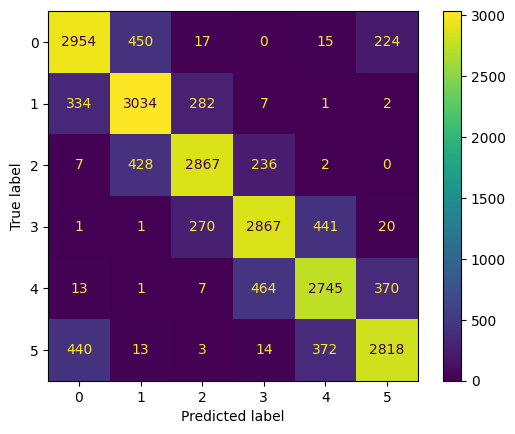

In [ ]:
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
start_time = time.time()
#Create Variables to Track Things
epochs = 60
train_losses = []
test_losses = []
train_correct = []
test_correct = []
training_wrong = []
testing_wrong = []
predictions = []
actual = []

#For loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  print(f'Train loader length: {len(train_loader)}')
  for b, (X_train, y_train) in enumerate(train_loader):
    #print("y_train shape:", y_train.shape)  # Should be (133,)
    #print("y_train dtype:", y_train.dtype)  # Should be torch.long
    #print("y_train min/max:", y_train.min().item(), y_train.max().item())  # Should be in [0, 7]
    b+=1 # Start our batches as 1
    y_pred = model(X_train) # get predicted values from training set. Not flattened, 2D
    loss = criterion(y_pred, y_train) # how off are we, compare the predictons to the correct answers in y_train
    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() #how many we got correct from this specific batch, True =1, False = 0, sum those up
    for k in range(len(y_train)):
      if predicted[k] != y_train[k]:
        training_wrong.append((predicted[k].item(), y_train[k].item()))
    trn_corr += batch_corr  #keep track as we go along in training

    #Update Parameter
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print results
    if b%4 == 0:
      print(f'epoch: {i}  batch: {b}  loss: {loss.item()}   accuracy: {trn_corr.item()*100/(128*b)}%')

  train_losses.append(loss)
  train_correct.append(trn_corr)





  #Test
  with torch.no_grad(): #no gradient so we dont update our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] #adding up correct predictions
      tst_corr += (predicted == y_test).sum() #T=1, F=0, and sum
      actual.extend(y_test.tolist())
      predictions.extend(predicted.tolist())
      for j in range(len(y_test)):
        if predicted[j] != y_test[j]:
          testing_wrong.append((predicted[j].item(), y_test[j].item()))
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)
  print(len(test_loader.dataset))
  test_acc = 100 * tst_corr / len(test_loader.dataset)
  print(f"Epoch {i} Test accuracy: {test_acc:.2f}%")


current_time = time.time()
print((current_time - start_time) / 60)
print("Training Wrong", training_wrong)
print("Testing Wrong", testing_wrong)

#Confusion Matrix
cm = confusion_matrix(actual, predictions)
ConfusionMatrixDisplay(cm).plot()
print("\nClassification Report:")
print(classification_report(actual, predictions))

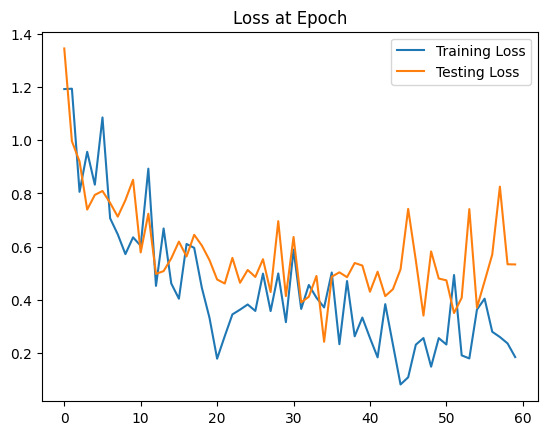

In [ ]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss at Epoch')
plt.legend()

In [ ]:
y_series = pd.Series(y)
print(y_series.value_counts())

2.0    306
4.0    203
5.0    185
0.0    177
1.0    139
3.0    121
Name: count, dtype: int64


In [ ]:
print(df['state'].value_counts())

state
2.0    306
4.0    203
5.0    188
0.0    181
1.0    139
3.0    121
Name: count, dtype: int64


In [ ]:
model.eval()
with torch.no_grad():
  # Select the first window of data from the DataFrame
  window_size = 8  # Assuming the model was trained with window_size = 8
  sensor_columns = [
      'roll_angle1', 'pitch_angle1', 'roll_angle2', 'pitch_angle2',
      'acc_x1', 'acc_y1', 'acc_z1',
      'vel_x1', 'vel_y1', 'vel_z1',
      'acc_x2', 'acc_y2', 'acc_z2',
      'vel_x2', 'vel_y2', 'vel_z2'
  ]
  # Select the first window_size rows and the sensor columns
  test_sample_df = df.iloc[len(df) - 9:len(df)-1][sensor_columns]

  # Convert the dataframe window to a numpy array and then to a FloatTensor
  X_test_sample = torch.FloatTensor(test_sample_df.values)

  # The model expects input shape (batch_size, channels, time)
  # Reshape the single window to have a batch size of 1
  # Original shape after converting to tensor: (time, features) -> (8, 16)
  # Permute to (features, time) -> (16, 8) as expected by the model's forward method before the initial permute
  X_test_sample = X_test_sample.permute(1, 0).unsqueeze(0) # Shape: (1, 16, 8)

  # Get the model's prediction
  y_val = model(X_test_sample)

  # Get the predicted class index
  predicted = torch.max(y_val.data, 1)[1]

  print(f"Predicted class: {predicted.item()}")

Predicted class: 4


In [ ]:
X_test_sample_second = X_test[36]
X_test_sample_second

tensor([[ 1.5577e+00,  9.1683e-01, -4.3559e-01, -1.5225e+00, -3.9628e+00,
         -4.3348e+00, -3.3841e+00,  4.4066e+00],
        [ 6.0991e+01,  5.8628e+01,  5.7120e+01,  5.7527e+01,  6.5765e+01,
          6.4480e+01,  6.4832e+01,  6.7915e+01],
        [-1.3912e+00, -1.1688e+00, -1.7764e+00, -3.0761e+00, -4.9511e+00,
         -6.6004e+00, -8.8084e+00, -4.1329e+00],
        [ 7.9313e+01,  7.8119e+01,  7.7179e+01,  7.6095e+01,  7.6951e+01,
          7.9429e+01,  8.0732e+01,  7.2948e+01],
        [-9.9774e-01, -9.3964e-01, -8.9643e-01, -8.6420e-01, -9.7968e-01,
         -9.4428e-01, -1.3344e+00, -9.1742e-01],
        [-1.4912e-02, -8.5645e-03,  1.2920e-02,  6.7119e-02,  5.3936e-02,
         -5.9011e-01, -2.2146e-01,  1.6404e-01],
        [-3.6072e-01, -6.1878e-01, -6.9837e-01, -5.8704e-01, -2.2620e-01,
         -6.4824e-02, -7.0081e-01, -3.9490e-01],
        [ 6.8136e+00, -1.7583e+01, -3.8362e+01, -3.5950e+01, -7.0576e+01,
          3.0050e+01,  3.6096e+01, -3.2362e+01],
        [-7.0010

In [ ]:
y_sample_ssecond = y_test[36]
y_sample_ssecond

tensor(5)

In [ ]:
import torch.nn.functional as F

with torch.no_grad():
    # Add a batch dimension to your test sample
    X_test_sample_second_batched = X_test_sample_second.unsqueeze(0)

    # Get raw logits from the model
    time1 = time.time()
    logits = model(X_test_sample_second_batched)
    time2 = time.time()
    print(f"Time taken: {time2 - time1} seconds")
    # Convert logits to probabilities
    probs = F.softmax(logits, dim=1)

    # Get predicted class index and confidence score
    predicted_class = torch.argmax(probs, dim=1).item()
    confidence = torch.max(probs, dim=1).values.item()

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")

Time taken: 0.0036034584045410156 seconds
Predicted class: 5
Confidence: 0.99


In [ ]:
#Save the model
torch.save(model.state_dict(), 'gait_cnn_model.pt')

In [ ]:
#Load saved model just to check everything was saved correctly
new_model = GaitCNN()
new_model.load_state_dict(torch.load('gait_cnn_model.pt'))
new_model.eval()


GaitCNN(
  (lstm): LSTM(16, 64, num_layers=3, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (conv1): Conv1d(64, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=6, bias=True)
)

In [ ]:
from google.colab import files
#files.download("gait_cnn_model.pt")

In [ ]:
pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 77.1 MB/s eta 0:00:00


In [ ]:
#Convert to Onnx format
test_input = torch.randn(1, 16, 8)
torch.onnx.export(model, test_input, "gait_cnn_model.onnx", opset_version=12, do_constant_folding=True, input_names=["input"], output_names=["output"], dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}})


/usr/local/lib/python3.11/dist-packages/torch/onnx/symbolic_opset9.py:4277: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


In [ ]:
#files.download("gait_cnn_model.onnx")

In [ ]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort

#Create an inference session
ort_session = ort.InferenceSession("gait_cnn_model.onnx", providers=["CPUExecutionProvider"])

In [ ]:
#Create an input
onnxruntime_input = X_test_sample_second.numpy()

# Add a batch dimension to the input
onnxruntime_input = onnxruntime_input[np.newaxis, :, :]

#Run inference using ONNX runtime session
time3 = time.time()
ort_output = ort_session.run(None, {"input": onnxruntime_input})
time4 = time.time()
print(f"Time taken: {time4 - time3} seconds")

#Find predicted class
predicted_class = np.argmax(ort_output)
print(f"Predicted class: {predicted_class}")

Time taken: 0.0008864402770996094 seconds
Predicted class: 5


In [ ]:
def softmax(x):
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum(axis=1, keepdims=True)

logits2 = ort_output[0]
probs2 = softmax(logits2)
predicted_class2 = np.argmax(probs2, axis=1)[0]
confidence2 = np.max(probs2, axis=1)[0]

print(f"Predicted class: {predicted_class2}")
print(f"Confidence: {confidence2:.2f}")

Predicted class: 5
Confidence: 0.99
